# Aplicação de algoritimos de Machine Learning sobre dataset Titanic do Kaggle

https://www.kaggle.com/competitions/titanic/overview

In [129]:
#importação das bibliotecas e pacotes
import pandas as pd
import numpy as np
import seaborn as sns

In [130]:
#lendo os arquivos
df_test = pd.read_csv('test.csv')

df_train = pd.read_csv('train.csv')

In [131]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## subistuindo valores NAs do dataset de treino

In [133]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [134]:
#substiundo valores nulos da variavel Age

In [135]:
df_train['Age'].median()

28.0

In [136]:
df_train['Age'] = df_train['Age'].replace(to_replace=np.nan, value=df_train['Age'].median())

In [137]:
#substiundo valores nulos da variavel Embarked

In [138]:
df_train['Embarked'].mode()[0]

'S'

In [139]:
df_train['Embarked'] = df_train['Embarked'].replace(to_replace=np.nan, value=df_train['Embarked'].mode()[0])

## analise estatistica sobre algumas variaveis do dataset de treino

In [140]:
#verificando as idades max e minima dos passageiros
max(df_train['Age']), min(df_train['Age'])

(80.0, 0.42)

In [141]:
#verificando a quantidade de homens e mulheres
frequencia = df_train['Sex'].value_counts()

percentual = df_train['Sex'].value_counts(normalize=True) * 100

In [142]:
dist_freq_qualitativa_sexo = pd.DataFrame({'Frequência': frequencia,
                                           'Porcentagem (%)': percentual})

In [143]:
dist_freq_qualitativa_sexo.rename_axis('Sexo', axis = 'columns', inplace=True)

In [144]:
dist_freq_qualitativa_sexo

Sexo,Frequência,Porcentagem (%)
male,577,64.758698
female,314,35.241302


In [145]:
#criando crosstable a partir das colunas Pclass e Sex

In [146]:
classes = {3: 'Terceira',
           1: 'Primeira',
           2: 'Segunda'}

sexo = {'male': 'Masculino',
        'female': 'Feminino'}

In [147]:
frequencia = pd.crosstab(df_train['Pclass'], df_train['Sex'])

frequencia.rename(index = classes, inplace = True)
frequencia.rename(columns = sexo, inplace = True)

frequencia

Sex,Feminino,Masculino
Pclass,,
Primeira,94,122
Segunda,76,108
Terceira,144,347


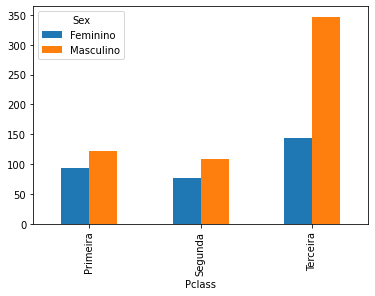

In [148]:
frequencia.plot(kind='bar');

In [149]:
#criando crosstable a partir das colunas Survived e Sex

In [150]:
sobrevivente = {1: 'Sim', 0: 'Não'}

In [151]:
frequencia = pd.crosstab(df_train['Survived'], df_train['Sex'])

frequencia.rename(index = sobrevivente, inplace = True)
frequencia.rename(columns = sexo, inplace = True)

frequencia

Sex,Feminino,Masculino
Survived,,
Não,81,468
Sim,233,109


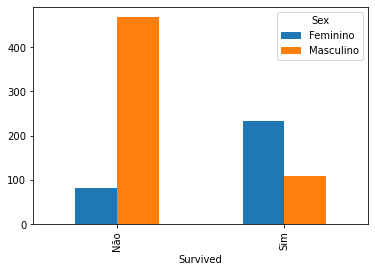

In [152]:
frequencia.plot(kind='bar');

In [153]:
#criando crosstable a partir das colunas Survived e Pclass

In [154]:
frequencia = pd.crosstab(df_train['Pclass'], df_train['Survived'])

frequencia.rename(index = classes, inplace = True)
frequencia.rename(columns = sobrevivente, inplace = True)

frequencia

Survived,Não,Sim
Pclass,,
Primeira,80,136
Segunda,97,87
Terceira,372,119


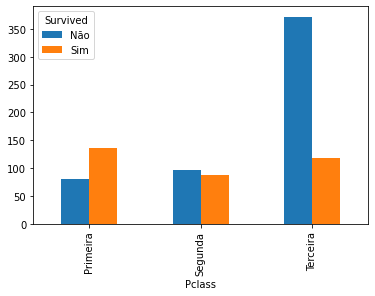

In [155]:
frequencia.plot(kind='bar');

## Analise grafica de algumas variaveis

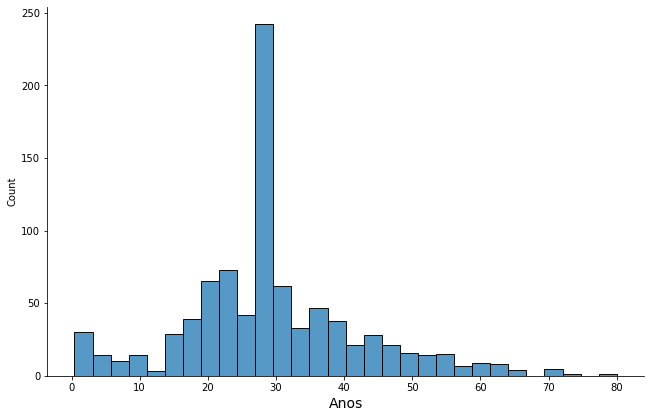

In [156]:
ax = sns.displot(df_train['Age'])

ax.figure.set_size_inches(10,6)
ax.set_titles('Distribuição de frequência - Age (Idade)', fontsize = 18)
ax.set_xlabels('Anos', fontsize= 14)
ax;

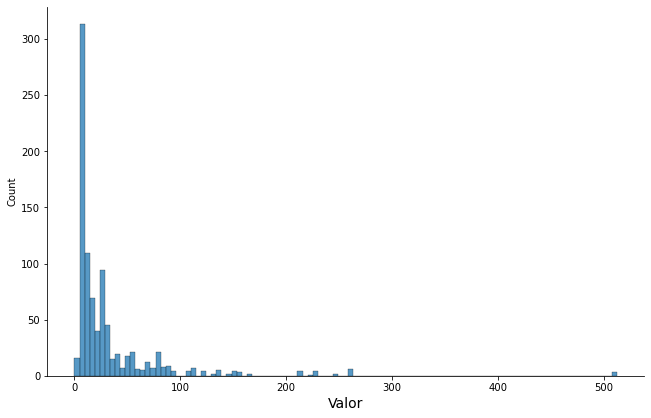

In [157]:
ax = sns.displot(df_train['Fare'])

ax.figure.set_size_inches(10,6)
ax.set_titles('Distribuição de frequência - Fare (Tarifa)', fontsize = 18)
ax.set_xlabels('Valor', fontsize= 14)
ax;

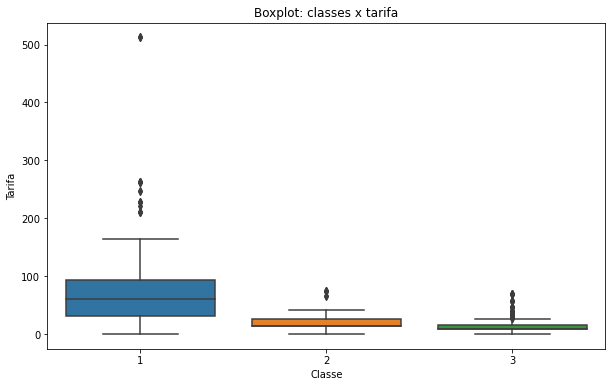

In [158]:
ax = sns.boxplot(x = 'Pclass', y = 'Fare', data = df_train)
ax.figure.set_size_inches(10,6)
ax.set_title('Boxplot: classes x tarifa')
ax.set_xlabel('Classe')
ax.set_ylabel('Tarifa')
ax;

In [159]:
df_train.query('Fare > 500')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


## Retirando as variaveis com valores descritivos e IDs

In [160]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [165]:
df_train = df_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [166]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
